In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine the data into a single dataset

master_df = pd.merge(city_data_df,ride_data_df, on =['city','city'])

# Display the data table for preview

master_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
unique_type = master_df['type'].unique()
print(unique_type)

['Urban' 'Suburban' 'Rural']


## Bubble Plot of Ride Sharing Data

In [6]:
# Obtain the x and y coordinates for each of the three city types

master_urban = master_df.loc[master_df["type"] == 'Urban', :]
master_suburban = master_df.loc[master_df["type"] == 'Suburban', :]
master_rural = master_df.loc[master_df["type"] == 'Rural', :]

In [7]:
# groupby per type

urban_fare = master_urban.groupby(['city']).mean()['fare']
urban_ride = master_urban.groupby(['city']).count()['ride_id']
urban_driver = master_urban.groupby(['city']).mean()['driver_count']

suburban_fare = master_suburban.groupby(['city']).mean()['fare']
suburban_ride = master_suburban.groupby(['city']).count()['ride_id']
suburban_driver = master_suburban.groupby(['city']).mean()['driver_count']

rural_fare = master_rural.groupby(['city']).mean()['fare']
rural_ride = master_rural.groupby(['city']).count()['ride_id']
rural_driver = master_rural.groupby(['city']).mean()['driver_count']

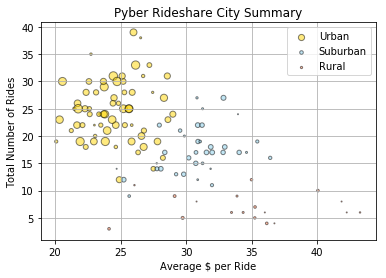

In [8]:
# Build the scatter plots for each city types
# Incorporate the other graph properties
plt.scatter(urban_fare, urban_ride, s=urban_driver, c='gold', edgecolor='black', alpha=0.5)
plt.scatter(suburban_fare, suburban_ride, s=suburban_driver, c='skyblue', edgecolor='black',alpha=0.5)
plt.scatter(rural_fare, rural_ride, s=rural_driver, c='coral', edgecolor='black', alpha=0.5)

plt.title("Pyber Rideshare City Summary")
plt.xlabel("Average $ per Ride")
plt.ylabel("Total Number of Rides")
plt.grid()

# Create a legend
plt.legend(['Urban', 'Suburban', 'Rural'])

In [9]:
# Save Figure
plt.savefig("rideshare.png")

<Figure size 432x288 with 0 Axes>

In [10]:
# Show plot
plt.show()

## Total Fares by City Type

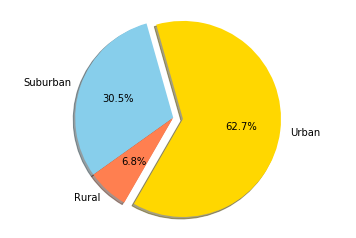

In [11]:
# Calculate Type Percents
total_fare = master_df.sum()['fare']
urban_fare_cent = master_urban.sum()['fare'] / total_fare * 100
suburban_fare_cent = master_suburban.sum()['fare'] / total_fare * 100
rural_fare_cent = master_rural.sum()['fare'] / total_fare * 100

percents = [urban_fare_cent, suburban_fare_cent, rural_fare_cent]
labels = ['Urban', 'Suburban', 'Rural']
colors = ['gold', 'skyblue', 'coral']
explode = [.1,0,0]

# Build Pie Chart
plt.pie(percents, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.axis("equal")

# Save Figure
plt.savefig("fares_pie.png")

In [12]:
# Show Figure
plt.show()

## Total Rides by City Type

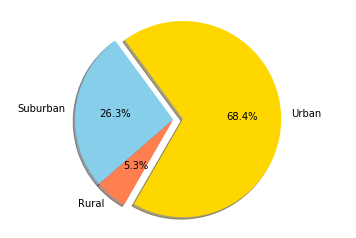

In [13]:
# Calculate Ride Percents
total_rides = master_df.count()['ride_id']
urban_cent = urban_ride.sum() / total_rides * 100
suburban_cent = suburban_ride.sum() / total_rides * 100
rural_cent = rural_ride.sum() / total_rides * 100

percents = [urban_cent, suburban_cent, rural_cent]
labels = ['Urban', 'Suburban', 'Rural']
colors = ['gold', 'skyblue', 'coral']
explode = [.1,0,0]

# Build Pie Chart
plt.pie(percents, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.axis("equal")

# Save Figure
plt.savefig("rides_pie.png")

In [14]:
# Show Figure
plt.show()

## Total Drivers by City Type

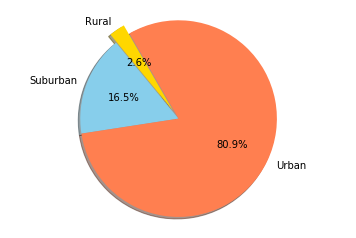

In [15]:
total_drivers = city_data_df.sum()['driver_count']
drivers_cent = city_data_df.groupby(['type']).sum()['driver_count'] / total_drivers *100

percents = [drivers_cent[0],drivers_cent[1], drivers_cent[2] ]
labels = ['Rural','Suburban', 'Urban',]
colors = ['gold', 'skyblue', 'coral']
explode = [.1,0,0]

plt.pie(percents, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")

# Save Figure
plt.savefig("rides_pie.png")

In [16]:
# Show Figure
plt.show()